## Emotion Detection from Text (NLP + Classification)
Build a model to detect emotions (joy, anger, sadness, etc.) from user-generated text like tweets, comments, or messages using Natural Language Processing (NLP) and classification techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import nltk
from nltk.corpus import stopwords
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\diyas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### 1. Load dataset

In [2]:
train = pd.read_csv("train.txt", sep=';', names=["text", "emotion"])
test = pd.read_csv("test.txt", sep=';', names=["text", "emotion"])
val = pd.read_csv("val.txt", sep=';', names=["text", "emotion"])

In [3]:
# Merge all data into one dataframe
df = pd.concat([train, test, val], ignore_index=True)
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger


### 2. Text Preprocessing

In [4]:
stop_words = set(stopwords.words('english'))

In [5]:
def clean_text(text):
    text = text.lower()  # lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # remove stopwords
    return text

In [6]:
df['clean_text'] = df['text'].apply(clean_text)

### 3. Train-Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['emotion'], test_size=0.2, random_state=42)

### 4. Text Vectorization (TF-IDF)

In [8]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

### 5. Train Model (SVM)

In [9]:
model = LinearSVC()
model.fit(X_train_tfidf, y_train)

LinearSVC()

### 6. Evaluate Model

In [10]:
y_pred = model.predict(X_test_tfidf)

In [11]:
print("\nModel Performance:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Performance:
Accuracy: 0.903

Classification Report:
               precision    recall  f1-score   support

       anger       0.91      0.88      0.90       536
        fear       0.87      0.85      0.86       458
         joy       0.91      0.94      0.93      1339
        love       0.82      0.81      0.82       335
     sadness       0.94      0.94      0.94      1173
    surprise       0.82      0.73      0.77       159

    accuracy                           0.90      4000
   macro avg       0.88      0.86      0.87      4000
weighted avg       0.90      0.90      0.90      4000



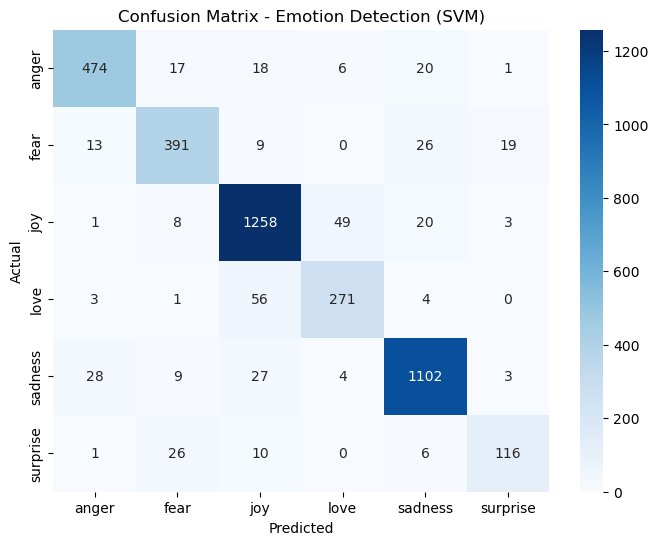

In [12]:
# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix - Emotion Detection (SVM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### 7. Predict Custom User Input

In [13]:
def predict_emotion(text):
    print(text)
    cleaned = clean_text(text)
    vectorized = vectorizer.transform([cleaned])
    pred = model.predict(vectorized)[0]
    print(f"Predicted Emotion: {pred}\n")

In [14]:
# Example user tests
print("Custom Predictions:\n")
predict_emotion("I am feeling fantastic today!")
predict_emotion("I am so angry and frustrated right now.")
predict_emotion("I love how peaceful it is here.")

Custom Predictions:

I am feeling fantastic today!
Predicted Emotion: joy

I am so angry and frustrated right now.
Predicted Emotion: anger

I love how peaceful it is here.
Predicted Emotion: joy

